## Simulation und Modellierung WS 17/18 Uebung 07 : 
### Methode der kleinsten quadratischen Abweichungen

### <u>Aufgabe 1</u>

Fuer die Koordinaten $(x,y)$ eines beliebiegen Kegelschnittes in der Ebene gilt

$$
        f(x,y) = A x^2 + B xy + C y^2 + D x + E y = 1
$$

Die Datei `orbit.dat` enthaelt eine Tabelle von $x$ und $y$ Werten, welche messfehlerbehaftete Punkte eines Kegelschnittes sind. 


- Laden Sie die Daten in ein `numpy` Array und finden Sie die Koeffizienten $A,B,C,D$ und $E$, welche die Summe der quadratischen Abweichungen ueber alle Messpunkte des Ausdrucks auf der linken Seite zur Zahl `1` minimiert.

Der Kegelschnitt ist eine geschlossene Kurve, wenn $B^2-4AC<0$ gilt, eine Parabel, wenn $B^2-4AC=0$ und ansonsten eine Hyperbel.

- Ist dieser Kegelschnitt eine offene oder geschlossene Kurve?
- Zeichnen Sie alle Kurven $y=y(x)$, die die Kegelschnittgleichung erfuellen zusammen mit den Datenpunkten in ein Diagram.

*Hinweis* : Sie koennen entweder Kegelschnittgleichung als quadratische Gleichung explizit nach $y$ aufloesen und beide Loesungen dort plotten, wo der Imaginaerteil gleich Null (oder sehr klein) ist, oder die matplotlib Funktion `mpl.contour(X,Y,f(X,Y),[1.0])` mit `X,Y = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))`, um die Hoehenlinie $f(X,Y)=1$ darzustellen.

*Zur Erinnerung* : Die Summe der quadratischen Abweichungen eines ueberbestimmten linearen Gleichungssystems

$$
    \mathrm{A}(\vec{x},\vec{y}) \vec{c} = \vec{b}
$$
wird durch die Loesung des kleineren linearen Gleichungssystems

$$
    \mathrm{A}^\top\mathrm{A} \vec{c} = \mathrm{A}^\top\vec{b}
$$
minimiert.

In [24]:
from pylab import *
%matplotlib inline

geschlossene Kurve
(200, 2)


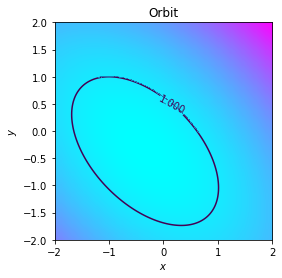

In [25]:
data=np.loadtxt('orbit.dat')          #läd Datei

N = data.shape[0]                   #Anzahl der Zeilen
x=data[:,0]                         #Vektor mit den x Werten
y=data[:,1]                         # und Vektor mit den y Werten



A = np.zeros(N*5)                   #leere Matrix mit N und 5 Spalten (für die 5 koeffizienten)
A.shape = (N,5)


A[:,0] = x**2                       #Formeln für die einzelnen Spalten
A[:,1] = x * y
A[:,2] = y**2
A[:,3] = x
A[:,4] = y

A_trans = A.transpose()             #erstellung der transponierten von A
b = np.ones(N)                      #und eines Vektors der Länge N


A_new = A_trans.dot(A)
b_new = A_trans.dot(b)
c = np.linalg.solve(A_new,b_new)

prüfzahl = c[1]**2 - 4 * c[0] * c[2]   #Gleichung für Prüfzahl

if prüfzahl <0:                        #wenn war ist es eine geschlossene Kurve 
    print("geschlossene Kurve")
elif prüfzahl ==0:
    print ("Parabel")                  #ansonsten ist es eine offene Kurve
else:
    print ("Hyperbel")
    
fig1, ax1 = plt.subplots(ncols=1,nrows=1)   #erstellt Figur und Axes
plt.title("Orbit")                           #Titel
plt.xlabel("$x$")                            #Achsenbeschriftungen
plt.ylabel("$y$")
X,Y = meshgrid(linspace(-2,2,200),linspace(-2,2,200))      
f = c[0] * X**2 + c[1] * X * Y + c[2] * Y**2 + c[3] * X + c[4] * Y     #Funktion des Kegelschnitts
plt.imshow(f,interpolation='none',origin='lower', extent=[-2,2,-2,2] ,cmap="cool")
cp = plt.contour(X,Y,f,[1.0])
clabel(cp)                                                                      
plot(x,y,',') 

print(data.shape)

### <u>Zusatzaufgabe</u>

- Schreiben Sie eine Funktion `polyfit(x,y,N=0)`, welche fuer `L` Datenpunkte in den Feldern `x` und `y` die Koeffizienten `c` eines Polynoms 
$$
    y = p(x)= c_0 x^0 + c_1 x^1 + c_2 x^2 + \dots + c_N x^N
$$ 
`N`ten Grades findet, welches die Summe der quadratischen Abweichungen $\sum_l (p(x_l)-y_l)^2$ minimiert.
- Demonstrieren Sie die Funktion grafisch anhand von `L` $\gg$ `N` Punkten eines Polynoms, welche zufaellige Abweichungen in $x$ und $y$ Richtung aufweisen. *Hinweis* : `np.random.randn(N)` generiert ein Feld mit N standard normalverteilten Zufallszahlen)
- Finden Sie ein Polynom, welches die Daten der ersten Aufgabe gut beschreibt.